# Vital dynamics

## A. Vector-borne disease with natality spreading

Simple model of a vector-borne disease with 10% host mortality spreading among hosts and vectors that have natural birth and death rates in a single population. There is no evolution and pathogen genomes don't affect spread.

In [1]:
from opqua.model import Model

### Model initialization and setup

#### Create a new `Model` object

In [2]:
my_model = Model() # Make a new model object.

#### Define a Setup for our system

Create a new set of parameters called `my_setup` to be used to simulate a population in the model. Use the default parameter set for a _vector-borne_ model.

In [3]:
my_model.newSetup(  # Create a new Setup.
    'my_setup', 
        # Name of the setup.
    preset='vector-borne',
        # Use default 'vector-borne' parameters.
    mortality_rate_host=1e-2,
        # change the default host mortality rate to 10% of recovery rate
    protection_upon_recovery_host=[0,10],
        # make hosts immune to the genome that infected them if they recover
        # [0,10] means that pathogen genome positions 0 through 9 will be saved
        # as immune memory
    birth_rate_host=1.5e-2,
        # change the default host birth rate to 0.015 births/time unit
    death_rate_host=1e-2,
        # change the default natural host death rate to 0.01 births/time unit
    birth_rate_vector=1e-2,
        # change the default vector birth rate to 0.01 births/time unit
    death_rate_vector=1e-2
        # change the default natural vector death rate to 0.01 deaths/time unit
    )

#### Create a population in our model

Create a new population of 100 hosts and 100 vectors called `my_population`. The population uses parameters stored in `my_setup`.

In [4]:
my_model.newPopulation( # Create a new Population.
    'my_population', 
        # Unique identifier for this population in the model.
    'my_setup', 
        # Predefined Setup object with parameters for this population.
    num_hosts=100, 
        # Number of hosts in the population with.
    num_vectors=100
        # Number of vectors in the population with.
    )

#### Manipulate hosts and vectors in the population

Add pathogens with a genome of _AAAAAAAAAA_ to 20 random hosts in population `my_population`.

In [5]:
my_model.addPathogensToHosts( # Add specified pathogens to random hosts.
    'my_population',
        # ID of population to be modified.
    {'AAAAAAAAAA':20} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values.
    )

### Model simulation

In [6]:
my_model.run(   # Simulate model for a specified time between two time points.
    0,          # Initial time point.
    200         # Final time point.
    ) 

Simulating time: 66.7483164411631, event: BIRTH_HOST
Simulating time: 175.53517979111868, event: CONTACT_HOST_VECTOR
Simulating time: 200.00318125185066 END


### Output data manipulation and visualization

#### Create a table with the results of the given model history

In [7]:
data = my_model.saveToDataFrame(
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row.
    'vector-borne_birth-death_example.csv'
        # Name of the file to save the data to.
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1995853034973145s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.019458293914794922s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.020659446716308594s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0252227783203125s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04323148727416992s.) Setting batch_size=32.
[Parallel(n_jobs=8)]: Done 408 task

...file saved.


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0.0,my_population,Host,my_population_0,NaN,NaN,True
1,0.0,my_population,Host,my_population_1,AAAAAAAAAA,NaN,True
2,0.0,my_population,Host,my_population_2,NaN,NaN,True
3,0.0,my_population,Host,my_population_3,NaN,NaN,True
4,0.0,my_population,Host,my_population_4,NaN,NaN,True
...,...,...,...,...,...,...,...
443810,200.0,my_population,Host,my_population_120,AAAAAAAAAA,NaN,False
443811,200.0,my_population,Host,my_population_136,AAAAAAAAAA,NaN,False
443812,200.0,my_population,Host,my_population_117,AAAAAAAAAA,NaN,False
443813,200.0,my_population,Host,my_population_136,AAAAAAAAAA,NaN,False


#### Create a compartment plot

Plot the number of susceptible and infected hosts in the model over time.

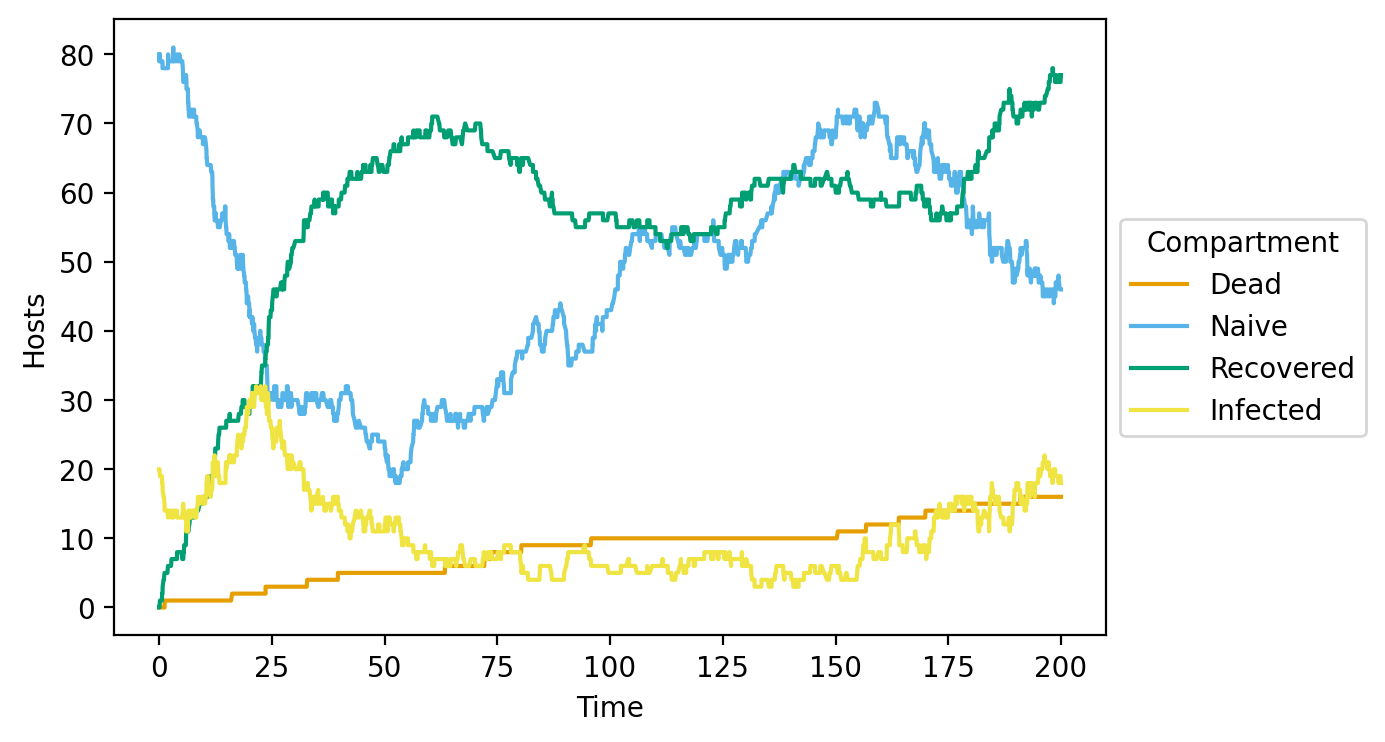

In [8]:
plot = my_model.compartmentPlot(
        # Create plot with number of naive, infected, recovered, dead hosts/vectors vs. time.
    'vector-borne_birth-death_example.png', 
        # File path, name, and extension to save plot under.
    data
        # Dataframe containing model history.
    )